# Introduction to neural network classification with TensorFlow
- binary clasification (is this mail spam or not)
[One thing or another], **1 or 0**

- multiclass classification (is this cat, dog or cow)
[More than one thing or another], **1 or x**, **One label per prediction**

- multilabel classification (what tags should this article have), **Multiple labels per prediction**

# Create a data to view and fit

In [ ]:
from sklearn.datasets import make_circles
import tensorflow as tf
import numpy as np

# make 1000 different examples
n_samples = 10000

# create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)


In [ ]:
print(X[:10], "\n"*2, y[:10])

[[ 0.0464692   0.82477834]
 [ 1.00506323 -0.43335153]
 [-0.58348442  0.79452834]
 [ 0.98478298 -0.32517879]
 [ 0.82993028 -0.54722305]
 [-0.13392877  0.77624858]
 [ 0.77919743  0.64581132]
 [ 0.72295477  0.17383084]
 [-0.12180665  0.79695076]
 [ 0.84952936  0.50567829]] 

 [1 0 0 0 0 1 0 1 1 0]


In [ ]:
# visualise the cell below where certain indexes of dimensions are chosen (only for my info)
X[:, 0][:3]

array([ 0.0464692 ,  1.00506323, -0.58348442])

In [ ]:
import pandas as pd

# create pandas sheet
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "Label": y})
circles.head()

,X0,X1,Label
0,0.046469,0.824778,1
1,1.005063,-0.433352,0
2,-0.583484,0.794528,0
3,0.984783,-0.325179,0
4,0.829930,-0.547223,0


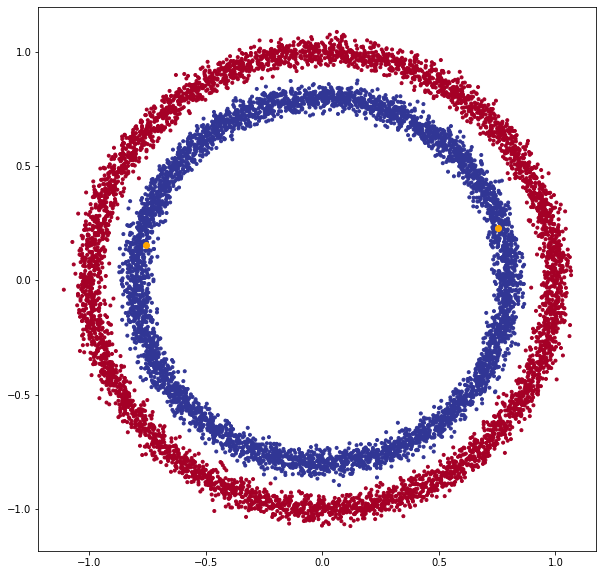

In [ ]:
import matplotlib.pyplot as plt

# Visualise with plot, notice that "Create circles function" creates X and y coordinates for each point.
# Makes all those coordinates with distribution to the circle


# c = y really calls the y labels from above...
plt.figure(figsize=(10, 10))
plt.scatter(circles["X0"], circles["X1"], c=y, cmap=plt.cm.RdYlBu, marker=".")
plt.scatter(0.754246, 0.231481, color="orange")
_ = plt.scatter(-0.756159,	0.153259, color="orange")


# input and output shapes

In [ ]:
X.shape, y.shape

((10000, 2), (10000,))

# steps in modeling
- create or import a model
- compile the model
- fit the model
- evaluate the model
- tweak
- evaluate 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

print(X_train.shape)
len(X_train), len(X_test), len(y_train), len(y_test)


X_train_normalizer = tf.keras.layers.Normalization(input_shape=[2], axis=None)
X_train_normalizer.adapt(X_train)

(7000, 2)


In [ ]:
# create a model
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([X_train_normalizer,
                               tf.keras.layers.Dense(512, activation="relu"),
                               tf.keras.layers.Dense(512, activation="relu"),
                               tf.keras.layers.Dense(512, activation="relu"),
                               tf.keras.layers.Dense(512, activation="relu"),
                               tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.000045),
                metrics="accuracy")

#lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# fit the model
history_1 = model_1.fit(X_train, y_train, epochs=50, verbose=1, validation_split=0.15) #, callbacks=[lr_scheduler])

Epoch 1/50
186/186 [==============================] - 3s 15ms/step - loss: 0.6871 - accuracy: 0.4975 - val_loss: 0.6861 - val_accuracy: 0.4762
Epoch 2/50
186/186 [==============================] - 3s 13ms/step - loss: 0.6753 - accuracy: 0.4997 - val_loss: 0.6643 - val_accuracy: 0.5590
Epoch 3/50
186/186 [==============================] - 3s 14ms/step - loss: 0.5975 - accuracy: 0.7382 - val_loss: 0.4670 - val_accuracy: 0.9733
Epoch 4/50
186/186 [==============================] - 3s 14ms/step - loss: 0.2486 - accuracy: 0.9908 - val_loss: 0.0942 - val_accuracy: 0.9990
Epoch 5/50
186/186 [==============================] - 3s 14ms/step - loss: 0.0524 - accuracy: 0.9985 - val_loss: 0.0291 - val_accuracy: 1.0000
Epoch 6/50
186/186 [==============================] - 3s 14ms/step - loss: 0.0216 - accuracy: 0.9997 - val_loss: 0.0168 - val_accuracy: 1.0000
Epoch 7/50
186/186 [==============================] - 2s 13ms/step - loss: 0.0151 - accuracy: 0.9985 - val_loss: 0.0109 - val_accuracy: 1.0000

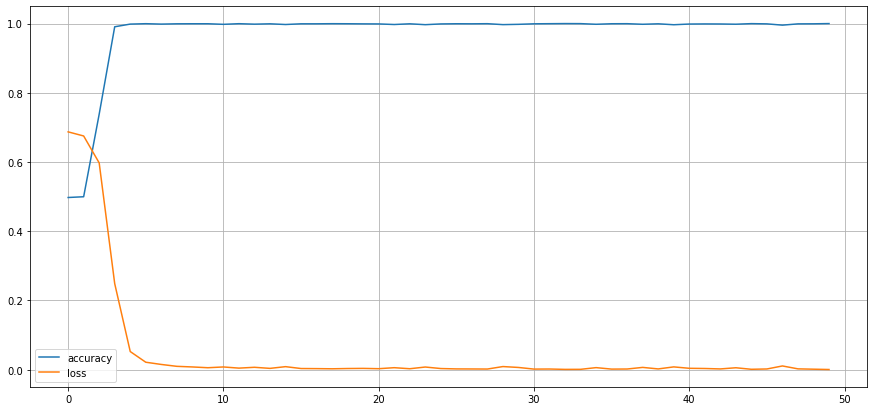

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(history_1.history["accuracy"], label=("accuracy"))
plt.plot(history_1.history["loss"], label="loss")
plt.legend()
plt.grid(True)

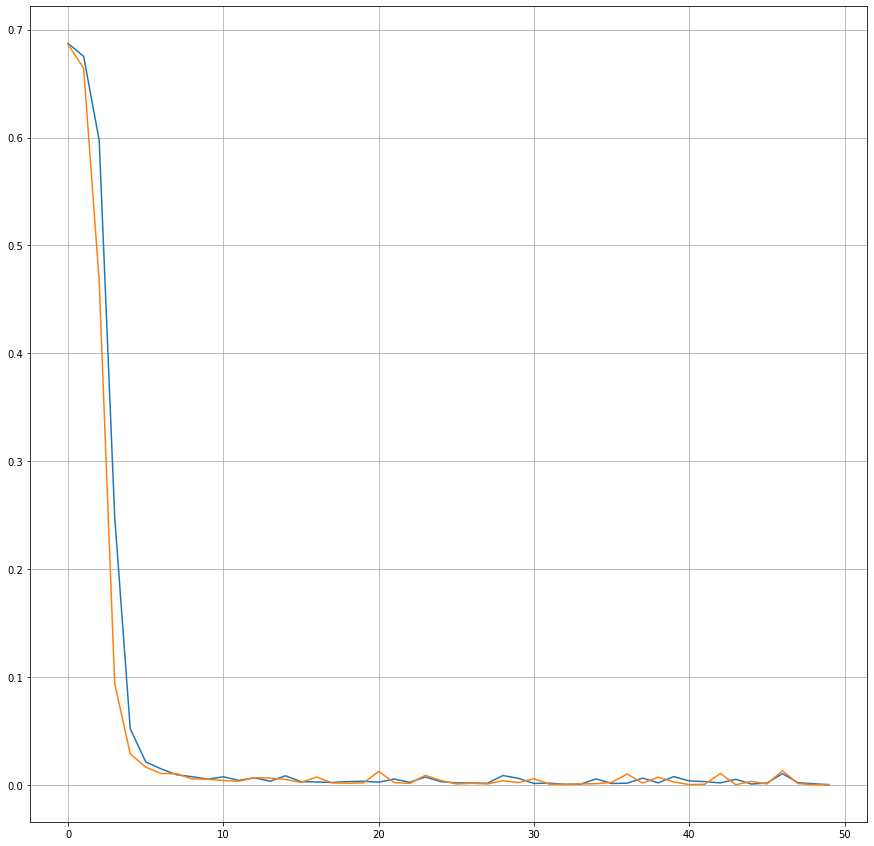

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(history_1.history["loss"])
plt.plot(history_1.history["val_loss"])
plt.grid(True)

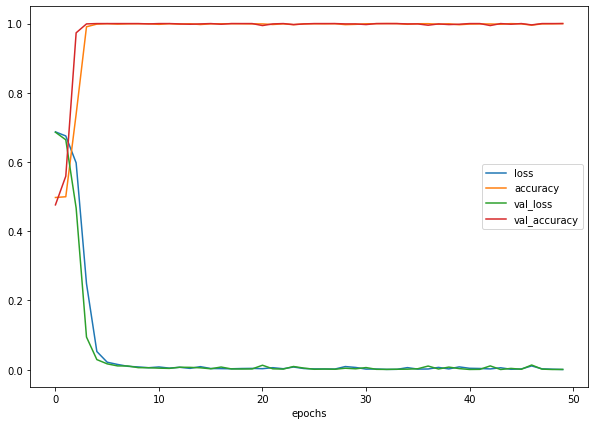

In [ ]:
pd.DataFrame(history_1.history).plot(figsize=(10,7), xlabel="epochs");

In [ ]:
"""# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(26)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_1.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");"""

'# Plot the learning rate versus the loss\nlrs = 1e-4 * (10 ** (np.arange(26)/20))\nplt.figure(figsize=(10, 7))\nplt.semilogx(lrs, history_1.history["loss"]) # we want the x-axis (learning rate) to be log scale\nplt.xlabel("Learning Rate")\nplt.ylabel("Loss")\nplt.title("Learning rate vs. loss");'

In [ ]:
from IPython.core.pylabtools import figsize
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.figure(figsize=(15, 15))
  plt.grid(True)
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xticks(np.arange(-1., 1., 0.1))
  plt.yticks(np.arange(-1., 1., 0.1))
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


doing binary classifcation...


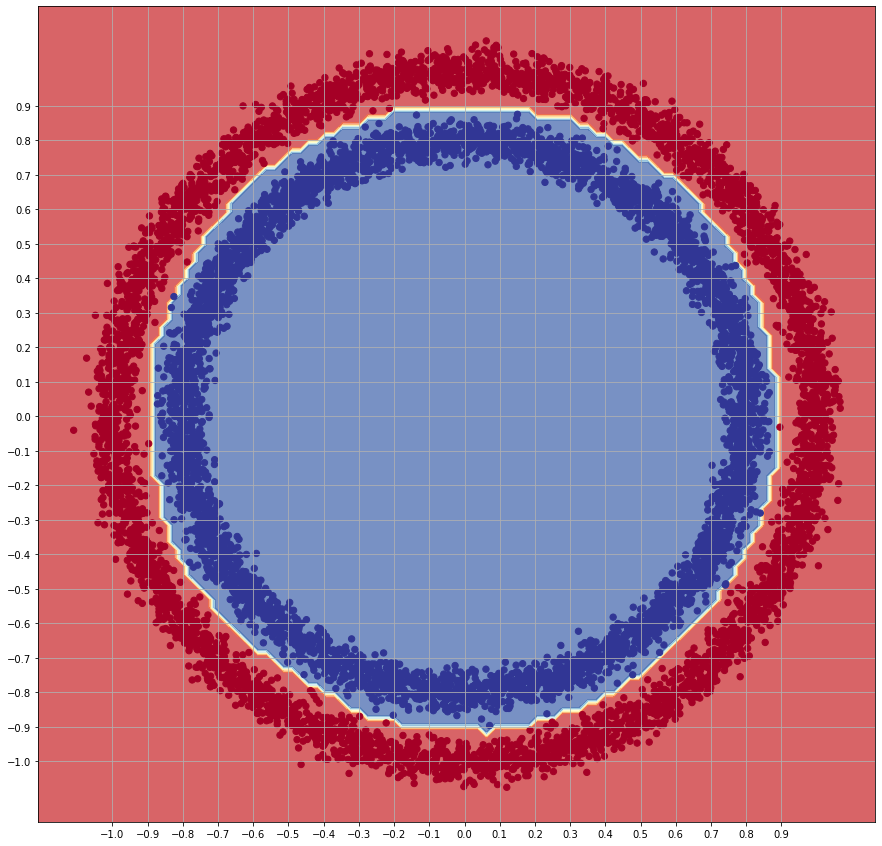

In [ ]:
plot_decision_boundary(model_1, X, y)

In [ ]:
# evaluate on original data
model_1.evaluate(X_test, y_test)

94/94 [==============================] - 0s 4ms/step - loss: 9.0560e-04 - accuracy: 0.9997


[0.0009055954869836569, 0.999666690826416]

In [ ]:
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=100)


In [ ]:
# evaluate on new features and labels
model_1.evaluate(X, y)

313/313 [==============================] - 1s 4ms/step - loss: 0.0017 - accuracy: 0.9996


[0.0016579012153670192, 0.9995999932289124]

doing binary classifcation...


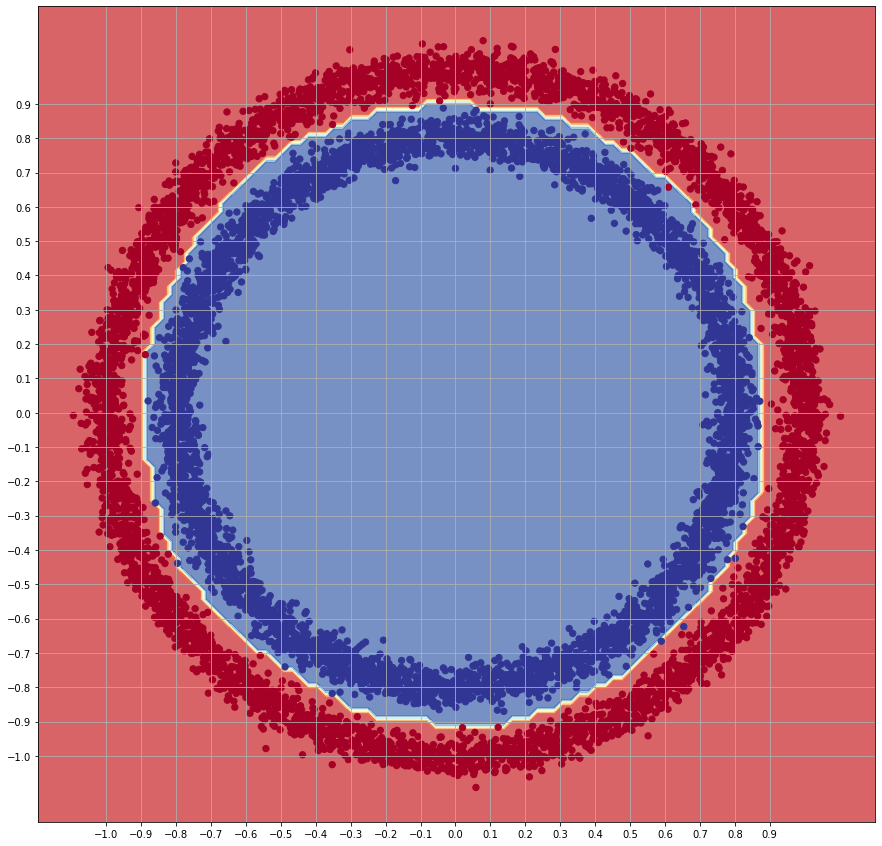

In [ ]:
# Check out the predictions our model is making 
plot_decision_boundary(model_1, X, y)